## 1. Data Preprocessing 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Employee_trans.csv', index_col=0) 
df  

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


## 2. Modeling

In [3]:
# Setting the target variable 

X = df.iloc[:, :-1] # as input variables
y = df.iloc[:, -1] # as target variable (label)


In [4]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [5]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

### 2.2 Splitting the data into training and testing data

In this example, we split the dataset into 70% training data and 30% test data. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, stratify=y, random_state=0)

In [7]:
# what dimensions does X_train (training data) and X_test (test data) have?

training_data = X_train.shape
print(f'The shape of training dataset is {training_data}')

test_data = X_test.shape
print(f'The shape of test dataset is {test_data}')

The shape of training dataset is (3103, 8)
The shape of test dataset is (1550, 8)


In [8]:
# check the distribution of the test dataset

y_test.value_counts()

0    1017
1     533
Name: LeaveOrNot, dtype: int64

### 2.3 SVM Model

Now we will model a Support Vector machine and apply it to our data. 

In [9]:
# Initialize the SVM function and apply it on our training set. 
# After the training we test the generalization ability on our test set.

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [10]:
# What are the support vectors?

svm.support_vectors_

array([[0.000e+00, 2.013e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [0.000e+00, 2.014e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.015e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [0.000e+00, 2.014e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [1.000e+00, 2.018e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [0.000e+00, 2.018e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00]])

### 2.4 Evaluation


In [11]:
# Check if the model overfits 
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.6561392201095714
test accuracy: 0.6561290322580645



True Positives(TP) =  1017

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  533


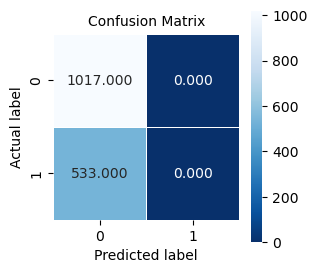

In [12]:
# print out the confusion matrix

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])

In [13]:
# what is the ROC-area under the curve? 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


### 2.5 Hyperparameter Tuning with GridSearchCV

To optimize our SVM model, we need to find out the best possible parameters. We can calculate this with GridSearchCV.

- C = Regularization parameter, which serves as a degree of importance that is given to misclassifications.
- Kernel = We differ between linear, polynomial, radial basis and sigmoid kernels. 
- Gamma = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’

In [ ]:
# what are the best parameters for the model? 

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10],'gamma': [0.1, 0.9], 'kernel': ('linear', 'rbf', 'sigmoid', 'poly')})
grid_search.fit(X_train, y_train)


In [ ]:
# print out best possible parameters

print("best parameter: ", grid_search.best_params_)

In [ ]:
# print out the best score

print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

In [ ]:
# Modeling SVM with the optimal parameters 

best_svm_model = SVC(kernel='poly', gamma = 0.9, C=10.0) 


# fit classifier to training set
best_svm_model.fit(X_train, y_train)


# make predictions on test set
y1_pred=best_svm_model.predict(X_test)


In [ ]:
# what are the support vectors for the optimized model?

best_svm_model.n_support_

In [ ]:
print("train accuracy before:",svm.score(X_train,y_train))
print("test accuracy before:",svm.score(X_test,y_test))


print("train accuracy after :",best_svm_model.score(X_train,y_train))
print("test accuracy after:",best_svm_model.score(X_test,y_test))

In [ ]:
# what is the ROC-area under the curve of the optimized model? 

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC before: {:.4f}'.format(ROC_AUC))

ROC_AUC1 = roc_auc_score(y_test, y1_pred)

print('ROC AUC after: {:.4f}'.format(ROC_AUC1))

With GridSearchCV we could achieve a slight improvement of the model.


### 2.6 Cross Validation

In [ ]:
# Compute the cross validation scores for the model with default settings (svm) and our optimized model (best_svm_model)

from sklearn.model_selection import cross_val_score

# cross validation for model with default settings (svm)
scores = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('Cross validation scores for model svm: %s' % scores)

# cross validation for optimized model (best_svm_model)
scores1 = cross_val_score(estimator = best_svm_model, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('Cross validation scores for model best_svm_model: %s' % scores1)

In [ ]:
# print the cross validated ROC-AUC for the optimized model (best_svm_model)

# cross validation for optimized model (best_svm_model)
Cross_validated_ROC_AUC1 = cross_val_score(best_svm_model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC1))

In [ ]:
# Perform a k-fold cross-validation 

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)



svm_scores = cross_val_score(best_svm_model, X, y, cv=kfold)

print('k-fold cross-validation scores:\n\n{}'.format(svm_scores))